In [2]:
import matplotlib.pyplot as plt

import numpy as np 


In [3]:
########
#BSMf.
########

class MCOptionPricing:
    
    def __init__(self, 
                 S0: float, K: float, T: float, R: float, sigma: float, intervals: int, simulations: int, seed: int = None) -> None:
        self.S0 = S0
        self.K = K
        self.T = T
        self.R = R
        self.sigma = sigma
        self.intervals = intervals
        self.dt = self.T / self.intervals
        self.simulations = simulations
        self.seed = seed

        if self.seed is not None:
            np.random.seed(self.seed)

        self.Z = np.random.standard_normal((self.simulations, self.intervals))
        self.price_array = np.zeros((self.simulations, self.intervals))
        self.price_array[:, 0] = self.S0
        self.terminal_price = None
        self.avg_terminal_price = None

    #Euler Scheme
    def simulation(self) -> float:

        drift = (self.R - 0.5 * self.sigma**2) * self.dt

        diffusion = self.sigma * np.sqrt(self.dt)

        for i in range(1, self.intervals):
            self.price_array[:, i] = self.price_array[:, i - 1] * np.exp(drift + diffusion * self.Z[:, i - 1])

        self.terminal_price = self.price_array[:, -1]

        self.avg_terminal_price = np.mean(self.terminal_price)
        
        return self.avg_terminal_price

    #+MCf.
    def pricing(self, option_type: str = "call") -> float:

        self.simulation()

        try: 

            if option_type.lower() == "call":
                terminal_profit = np.maximum(self.terminal_price - self.K, 0)

            elif option_type.lower() == "put":
                terminal_profit = np.maximum(-self.terminal_price + self.K, 0)

            else:
                raise ValueError("Invalid option type")
            
            avg_terminal_profit = np.mean(terminal_profit)

            discounted_profit = np.exp(-self.R * self.T) * avg_terminal_profit

            return discounted_profit
        
        except Exception:
            
            print(print(f"Error: {Exception}"))

    #+Plotting
    def plot_simulated_paths(self, num_paths_to_plot: int = 10) -> None:
        if num_paths_to_plot > self.simulations:
            num_paths_to_plot = self.simulations
        plt.figure(figsize=(10, 6))
        for i in range(num_paths_to_plot):
            plt.plot(np.linspace(0, self.T, self.intervals), self.price_array[i, :], lw=1)

        plt.xlabel('Time (years)')
        plt.ylabel('Asset Price')
        plt.title(f'Simulated Asset Paths ({num_paths_to_plot} paths)')
        plt.grid(False)
        plt.show()


The estimated price of the European call option is: 5.87


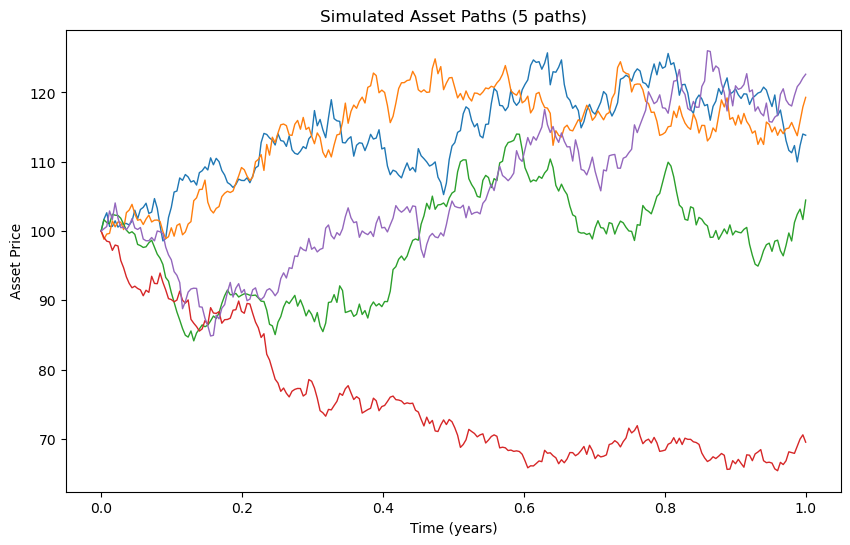

In [4]:
#e.g. Usage
S0 = 100      
K = 110      
T = 1          
R = 0.05      
sigma = 0.2
intervals = 252 
simulations = 10000

option_pricing = MCOptionPricing(S0, K, T, R, sigma, intervals, simulations, seed=10)

call_price = option_pricing.pricing(option_type="call")
print(f"The estimated price of the European call option is: {call_price.round(2)}")

option_pricing.plot_simulated_paths(num_paths_to_plot=5)


In [5]:
########
#BSMJumpf.
########

class MCJumpOptionPricing:
    
    def __init__(self, 
                 S0: float, K: float, T: float, R: float, sigma: float, intervals: int, simulations: int, lambda_: float, mu_jump: float, sigma_jump: float, seed: int = None) -> None:
        self.S0 = S0
        self.K = K
        self.T = T
        self.R = R
        self.sigma = sigma
        self.intervals = intervals
        self.dt = self.T / self.intervals
        self.simulations = simulations
        self.lambda_ = lambda_
        self.mu_jump = mu_jump
        self.sigma_jump = sigma_jump
        self.seed = seed

        if self.seed is not None:
            np.random.seed(self.seed)

        self.Z = np.random.standard_normal((self.simulations, self.intervals))
        self.J = np.random.standard_normal((self.simulations, self.intervals))
        self.N = np.random.poisson(self.lambda_ * self.dt, (self.simulations, self.intervals))
        self.price_array = np.zeros((self.simulations, self.intervals))
        self.price_array[:, 0] = self.S0
        self.terminal_price = None
        self.avg_terminal_price = None

    # #Euler Scheme
    def simulation(self) -> float:

        drift = (self.R - 0.5 * self.sigma**2 - self.lambda_ * (np.exp(self.mu_jump + 0.5 * self.sigma_jump**2) - 1)) * self.dt
        diffusion = self.sigma * np.sqrt(self.dt)

        for i in range(1, self.intervals):
            jump_component = (np.exp(self.mu_jump + self.sigma_jump * self.J[:, i - 1]) - 1) * self.N[:, i - 1]
            self.price_array[:, i] = self.price_array[:, i - 1] * np.exp(drift + diffusion * self.Z[:, i - 1]) * (1 + jump_component)

        self.terminal_price = self.price_array[:, -1]

        self.avg_terminal_price = np.mean(self.terminal_price)
        
        return self.avg_terminal_price

    #+MCf.
    def pricing(self, option_type: str = "call") -> float:

        self.simulation()

        try: 

            if option_type.lower() == "call":
                terminal_profit = np.maximum(self.terminal_price - self.K, 0)

            elif option_type.lower() == "put":
                terminal_profit = np.maximum(-self.terminal_price + self.K, 0)

            else:
                raise ValueError("Invalid option type")
            
            avg_terminal_profit = np.mean(terminal_profit)

            discounted_profit = np.exp(-self.R * self.T) * avg_terminal_profit

            return discounted_profit
        
        except Exception:
            
            print(print(f"Error: {Exception}"))

    #+Plotting
    def plot_simulated_paths(self, num_paths_to_plot: int = 10) -> None:
        if num_paths_to_plot > self.simulations:
            num_paths_to_plot = self.simulations
        plt.figure(figsize=(10, 6))
        for i in range(num_paths_to_plot):
            plt.plot(np.linspace(0, self.T, self.intervals), self.price_array[i, :], lw=1)

        plt.xlabel('Time (years)')
        plt.ylabel('Asset Price')
        plt.title(f'Simulated Asset Paths with Jumps ({num_paths_to_plot} paths)')
        plt.grid(False)
        plt.show()


The estimated price of the European call option with jumps is: 7.560159919978403


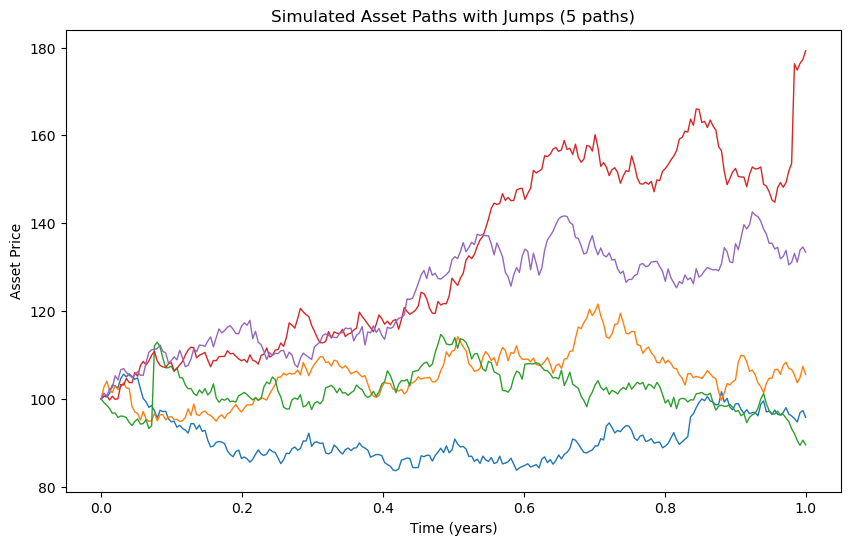

In [6]:
#e.g. Jump
S0 = 100          
K = 110        
T = 1             
R = 0.05          
sigma = 0.2     
intervals = 252   
simulations = 10000
lambda_ = 0.2
mu_jump = 0.2
sigma_jump = 0.2

jump_option_pricing = MCJumpOptionPricing(S0, K, T, R, sigma, intervals, simulations, 
                                          lambda_, mu_jump, sigma_jump, seed=42)

call_price = jump_option_pricing.pricing(option_type="call")
print(f"The estimated price of the European call option with jumps is: {call_price}")

# Optionally, plot some of the simulated paths
jump_option_pricing.plot_simulated_paths(num_paths_to_plot=5)


In [ ]:
#h.g.{